# Визуализация выборки MNIST 3

## MNIST Digits

Use data form https://www.kaggle.com/c/digit-recognizer/data and suppose that files test.csv and train.csv are in same folder as notebook. You can use subsamples to spead up your calculations.

In [2]:
# (1 point) load train data, save class labels, plot first point as a digit
import pandas as pd
import matplotlib.pyplot as plt
train_data = pd.read_csv("train.csv").sample(frac=1, random_state=133).reset_index(drop=True)
x_train = train_data.ix[:, 1:]
y_train = train_data["label"]

print(x_train.shape, y_train.shape)
print()
print(x_train.head(), y_train.head())

(42000, 784) (42000,)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


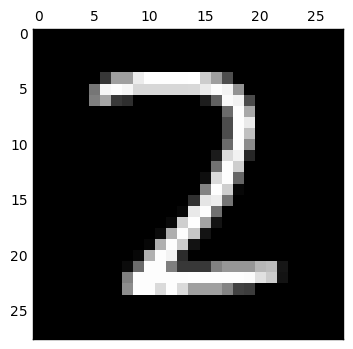

In [3]:
print(y_train.value_counts())
index = 15
plt.gray() 
plt.matshow(x_train.ix[index, :].reshape(28, 28)) 
plt.show() 

In [4]:
SAMPLE_SIZE = 5000
x_train = x_train.ix[:SAMPLE_SIZE, :]
y_train = y_train.ix[:SAMPLE_SIZE]
X = x_train
Y = y_train
n_neighbors_default = 30 #default
print(Y.value_counts())

1    544
0    533
3    516
7    514
4    510
6    502
8    499
2    474
9    474
5    435
Name: label, dtype: int64


________________

In [5]:
# Apply Isomap, Locally Linear Embedding, Spectral Embedding, Local Tangent Space Alignment, Multi-dimensional Scaling, t-distributed Stochastic Neighbor Embedding
# (5 points) apply methods to reduce dimension to two
# (3 points) plot results where the different digits are represented with different styles/colors
# (1 point) apply Out-of-Sample Isomap to an arbitrary point
# (1 point) make a conclusion

In [6]:
def plot_2d_data(X_2d, labels, t0, t1, title=None):
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap="Accent")
    if title != None:
        plt.title("{} ({:.2f} sec)".format(title, t1 - t0))
        

    plt.show()

import sklearn
from sklearn import manifold
from time import time

_________

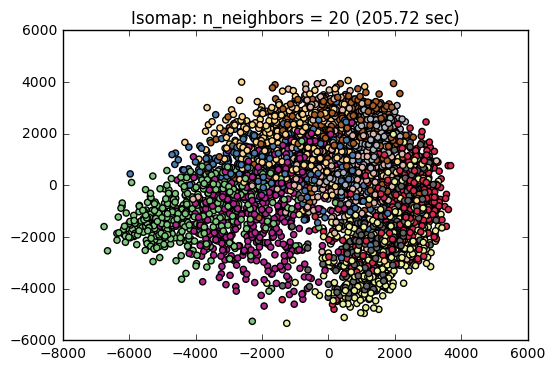

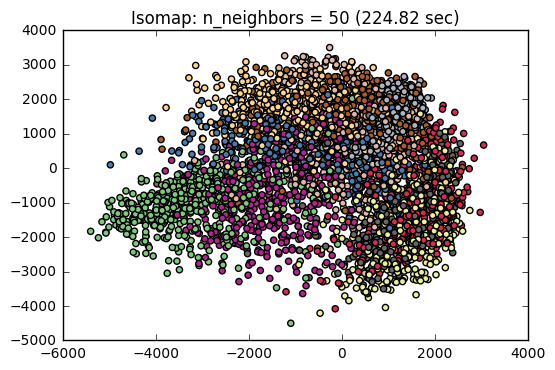

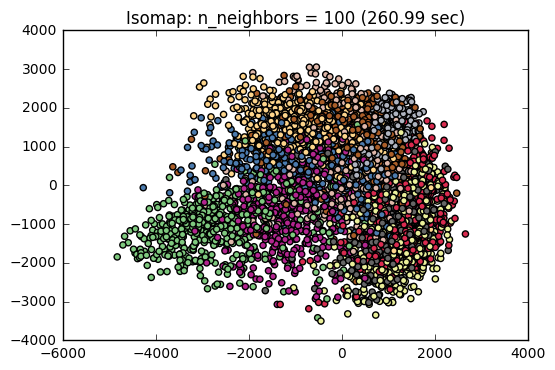

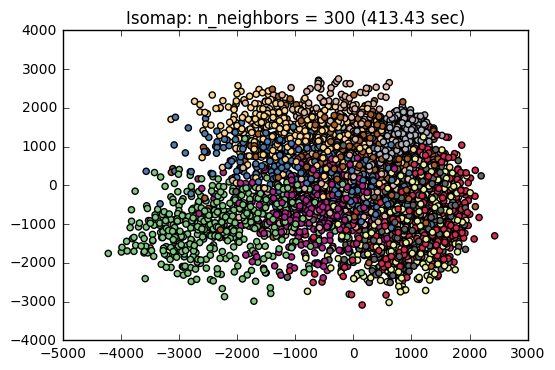

In [10]:
for n_neighbors in [20, 50, 100, 300]:
    model = sklearn.manifold.Isomap(n_neighbors=n_neighbors, n_components=2)

    t0 = time()
    model.fit(X)
    transormed_X = model.transform(X)
    t1 = time()

    plot_2d_data(transormed_X, Y, t0, t1, "Isomap: n_neighbors = {}".format(n_neighbors))

### Применим Out-of-sample Isomap

In [27]:
# Уберем из выборки один объект
x = X.ix[0, :]
X_isomap = X.ix[1:, :]
Y_isomap = Y.ix[1:]
model = sklearn.manifold.Isomap(n_neighbors=100, n_components=2)

In [29]:
# Обучим модель
t0 = time()
model.fit(X_isomap)
t1 = time()

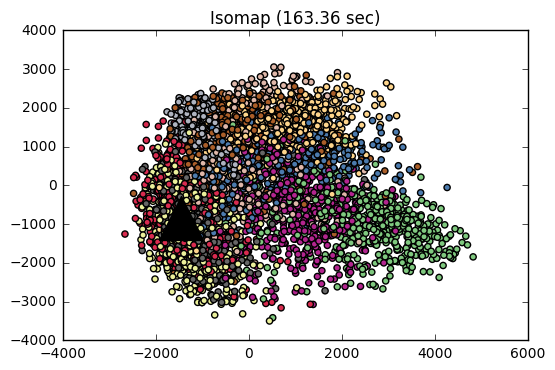

In [44]:
# Применим к объекту x
transformed_x = model.transform(x.reshape(1, -1))

# Отобразим объекты из обучающей выборки
transformed_X_isomap = model.transform(X_isomap)

# Нарисуем этот объект и обучающую выборку.
plt.scatter(transformed_X_isomap[:, 0], transformed_X_isomap[:, 1], c=Y_isomap[:], cmap="Accent")
plt.scatter(transformed_x[:, 0], transformed_x[:, 1], c='black', marker='^', s=1000)
plt.title("{} ({:.2f} sec)".format("Isomap", t1 - t0))

plt.show()

____________

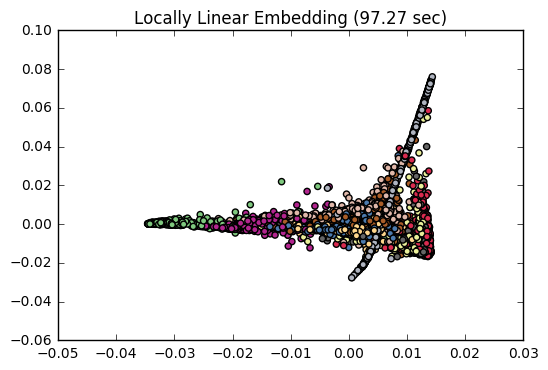

In [8]:
model = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=9, n_components=2,
                                      method='standard')
t0 = time()
transformed_X = model.fit_transform(X)
t1 = time()
plot_2d_data(transformed_X, Y, t0, t1, "Locally Linear Embedding")

__________

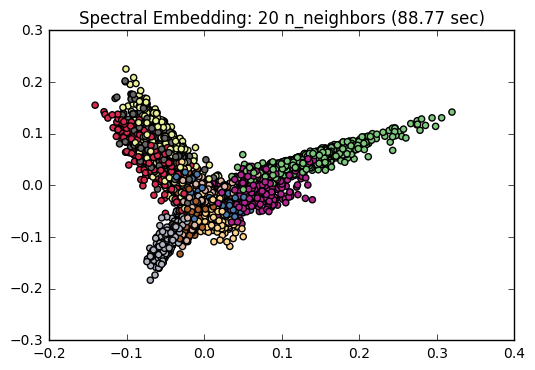

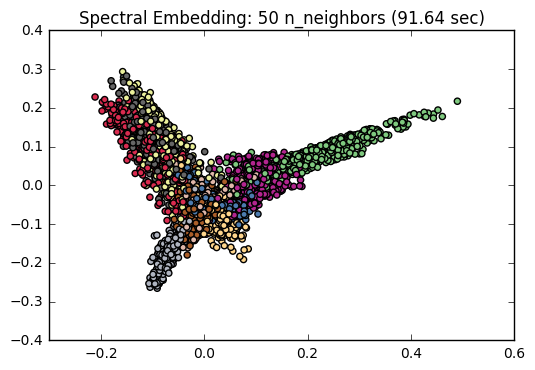

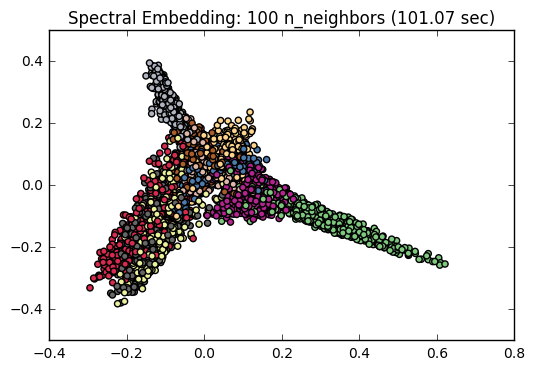

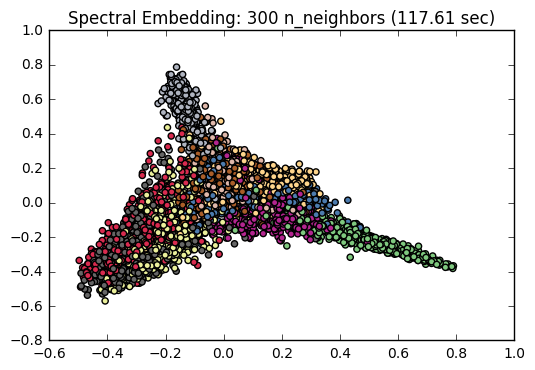

In [17]:
for n_neighbors in [20, 50, 100, 300]:
    t0 = time()
    model = manifold.SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
    transformed_X = model.fit_transform(X)
    t1 = time()
    plot_2d_data(transformed_X, Y, t0, t1, "Spectral Embedding: {} n_neighbors".format(n_neighbors))

_____________

#### LTSA выдает ошибку. Не удалось получить результаты.

_________

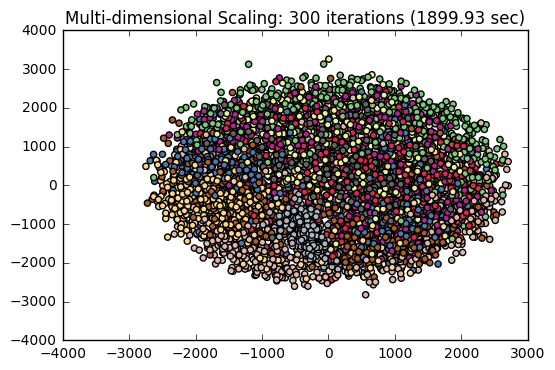

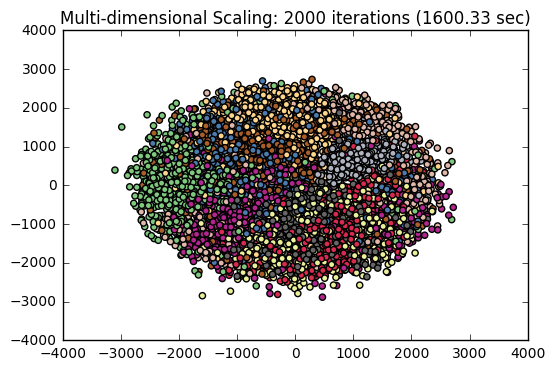

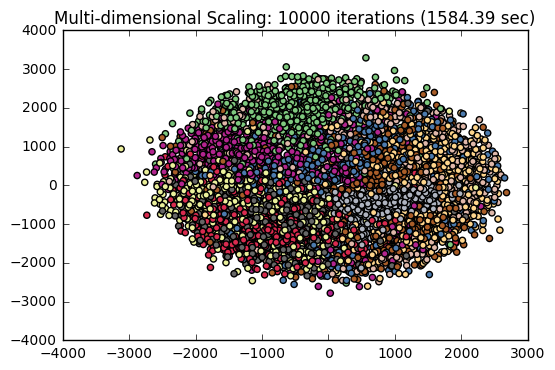

In [18]:
for max_iter in [300, 2000, 10000]:
    t0 = time()
    model = manifold.MDS(2, max_iter=1000, n_init=1)
    transformed_X = model.fit_transform(X)
    t1 = time()
    plot_2d_data(transformed_X, Y, t0, t1, "Multi-dimensional Scaling: {} iterations".format(max_iter))

Неуверенно, но с увеличением max_iter субъективно кажется, что качество результата повышается.

____________

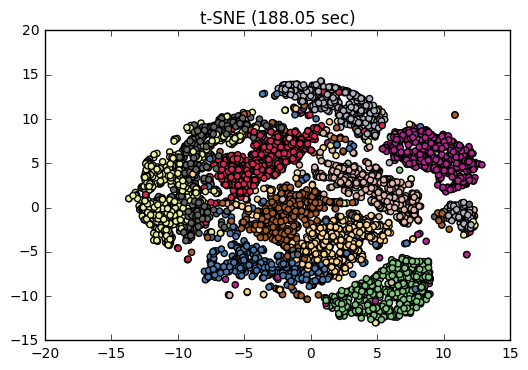

In [7]:
model = manifold.TSNE(n_components=2, random_state=132)
t0 = time()
transformed_X = model.fit_transform(X)
t1 = time()
plot_2d_data(transformed_X, Y, t0, t1, "t-SNE")

______________

## Conclusion 3

For acquaintance with non-linear methods of reducing the dimension, a sample of MNIST of size 5000 was used. There is a hypothesis (true for many data sets): objects of the same class or similar objects are at a small distance from each other, and different objects are at a large distance. Metric data analysis methods are based on this hypothesis.

The methods considered found two-dimensional representations of the MNIST sample. Some methods did worse: there are significant intersections of different classes. Best of all, the t-SNE method handled the task. He managed to find a two-dimensional representation of MNIST, in which different classes practically do not overlap.